In [1]:
import math
import random
import numpy as np
import cv2 as cv

obstacle_shape = {0: cv.MORPH_RECT, 1: cv.MORPH_CROSS, 2: cv.MORPH_ELLIPSE}

def make_map(sizeX : int, sizeY : int, obstacles_count : int = random.randint(1,5)):

    # Sanitize input
    # Check input type if they are integer or not.
    if type(sizeX) is not int:
        raise TypeError("sizeX only take positive integer as input.")
    if type(sizeY) is not int:
        raise TypeError("sizeY only take positive integer as input.")
    if type(obstacles_count) is not int:
        raise TypeError("obstacles_count only take positive integer or zero as input.")
    
    # Check if input is positive or not
    if (sizeX < 1):
        raise ValueError("sizeX only take positive integer as input.")
    if (sizeY < 1):
        raise ValueError("sizeY only take positive integer as input.")
    if (obstacles_count < 0):
        raise ValueError("obstacles_count only take positive integer or zero as input.")
        
    # initialized a map
    map = np.zeros((sizeY, sizeX)).astype(np.uint8)  

    # place obstacle
    for i in range(obstacles_count):

        # Randomize obstacle property
        obstacle_size = (random.randint(1, math.floor(sizeX / 2)), random.randint(1, math.floor(sizeY / 2)))
        obstacle_type = obstacle_shape[random.randint(0,2)]
        obstacle_position = (sizeX - obstacle_size[0] - 1, sizeY - obstacle_size[1] - 1)
        obstacle_position = (random.randint(0, obstacle_position[0]), random.randint(0, obstacle_position[1]))

        # Temp variable x, xm, y, ym
        x = obstacle_position[0]
        y = obstacle_position[1]
        xm = x + obstacle_size[0]
        ym = y + obstacle_size[1]
        map[y:ym, x:xm] = np.bitwise_or(map[y:ym, x:xm], cv.getStructuringElement(obstacle_type, obstacle_size))
     
    
    return map

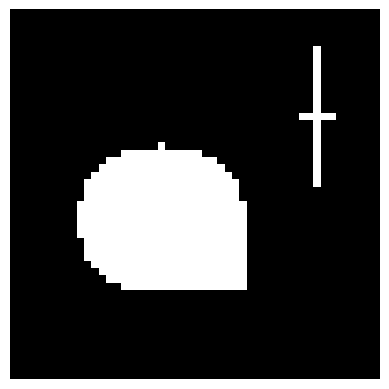

In [4]:
import matplotlib.pyplot as plt

map = make_map(50,50,3)

plt.imshow(map, cmap='grey', interpolation='nearest')
plt.axis('off')
plt.show()

In [ ]:
# Test cases generated by ChatGPT

test_cases = [
    (20,20),                            # Test case #1
    (3,23),                             # Test case #2
    (12,5),                             # Test case #3
    (20,20, 0),                         # Test case #4
    (20,20, 3),                         # Test case #5
    (12.3,32.1, None),                  # Test case #6
    (12.3,32.1, 3),                     # Test case #7
    (20,32.1, 1.2),                     # Test case #8
    (20,20, "None"),                    # Test case #9
    (0, 0, 0),                          # Test case #10
]


for i, case in enumerate(test_cases):

    print("test_cases #", i+1)
    try:
        if len(case) == 2:
            map = make_map(case[0],case[1])

        else:
            map = make_map(case[0],case[1],case[2])

        plt.imshow(map, cmap='grey', interpolation='nearest')
        plt.axis('off')
        plt.show()

    except Exception as e:
        print("Exception: ",e)
        pass

    

